### Exploratory Data Analysis of the FER-2013 Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:01<00:00, 44.1MB/s]


Extracting files...
Path to dataset files: C:\Users\gabri\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [3]:
import os

# Check contents of the dataset directory
print("Contents of the dataset directory:")
for root, dirs, files in os.walk(path):
    print(root, "contains:")
    print("  Directories:", dirs)
    print("  Files:", files)


Contents of the dataset directory:
C:\Users\gabri\.cache\kagglehub\datasets\msambare\fer2013\versions\1 contains:
  Directories: ['test', 'train']
  Files: []
C:\Users\gabri\.cache\kagglehub\datasets\msambare\fer2013\versions\1\test contains:
  Directories: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
  Files: []
C:\Users\gabri\.cache\kagglehub\datasets\msambare\fer2013\versions\1\test\angry contains:
  Directories: []
  Files: ['PrivateTest_10131363.jpg', 'PrivateTest_10304478.jpg', 'PrivateTest_1054527.jpg', 'PrivateTest_10590091.jpg', 'PrivateTest_1109992.jpg', 'PrivateTest_11296953.jpg', 'PrivateTest_12000629.jpg', 'PrivateTest_12008383.jpg', 'PrivateTest_12191716.jpg', 'PrivateTest_1221822.jpg', 'PrivateTest_12403575.jpg', 'PrivateTest_12766285.jpg', 'PrivateTest_12846357.jpg', 'PrivateTest_1290484.jpg', 'PrivateTest_12912780.jpg', 'PrivateTest_13164119.jpg', 'PrivateTest_13278552.jpg', 'PrivateTest_13463625.jpg', 'PrivateTest_13541561.jpg', 'PrivateTest_136

Training set sample images:


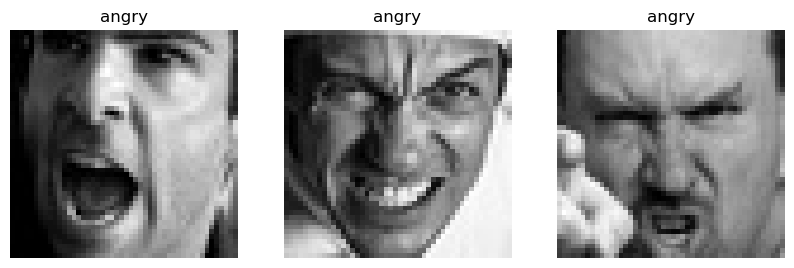

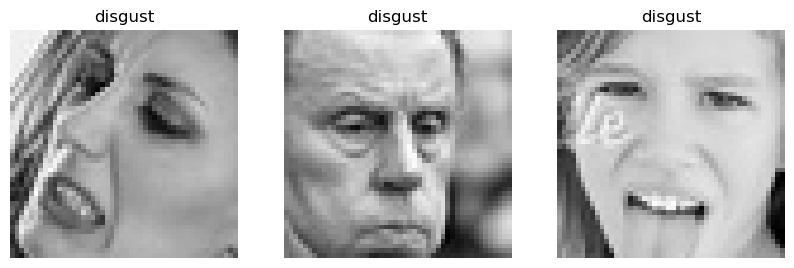

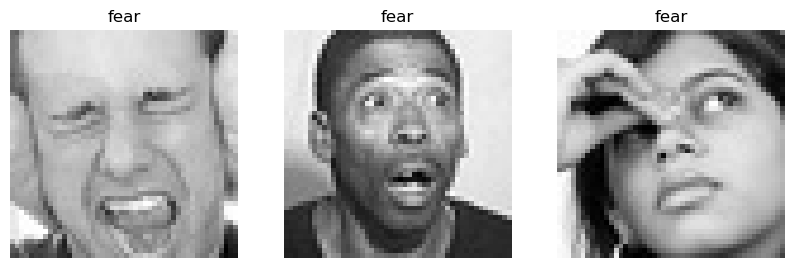

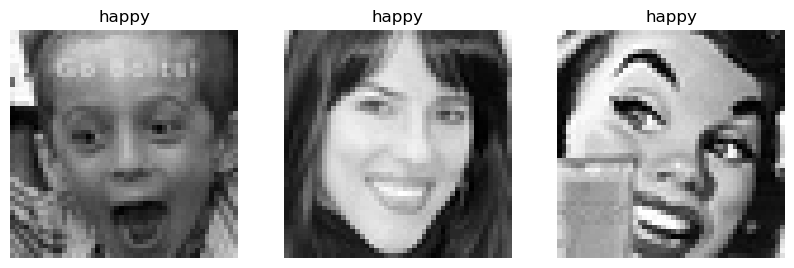

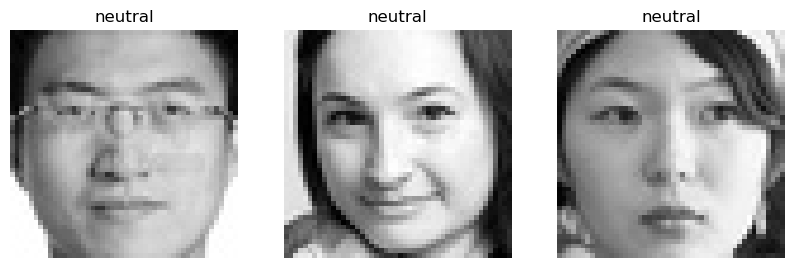

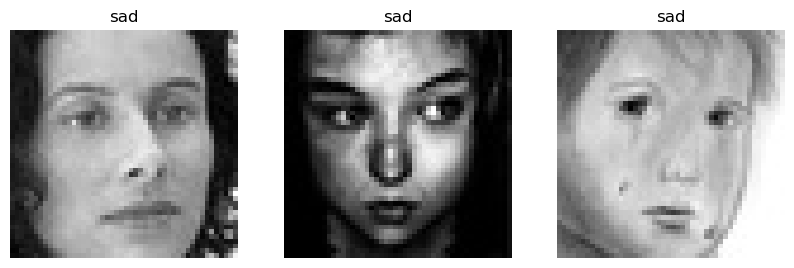

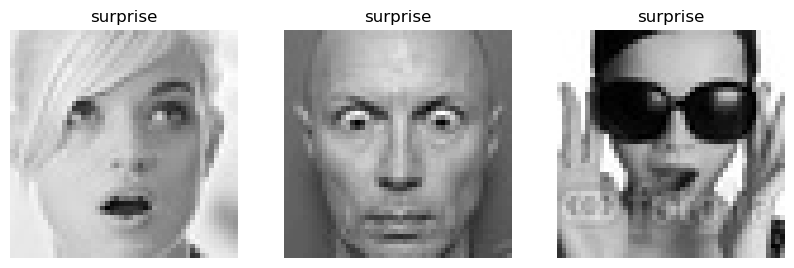

Testing set sample images:


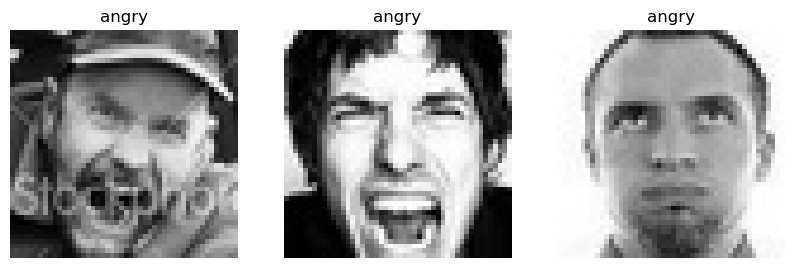

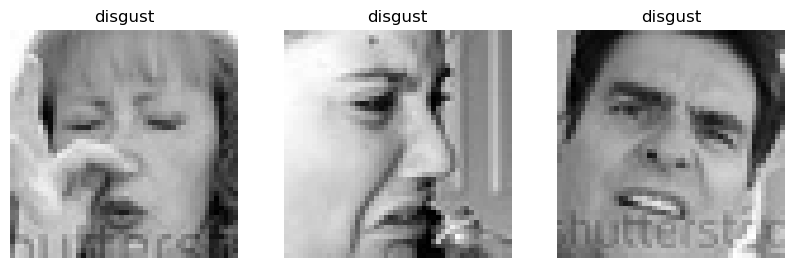

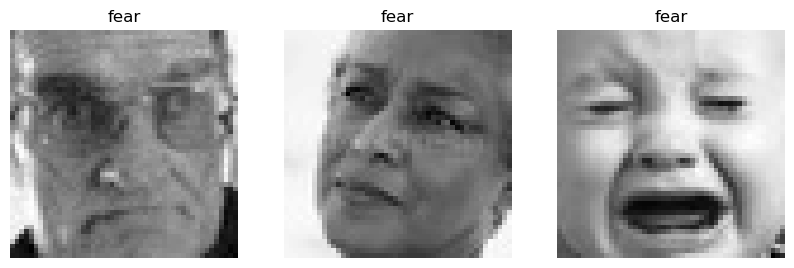

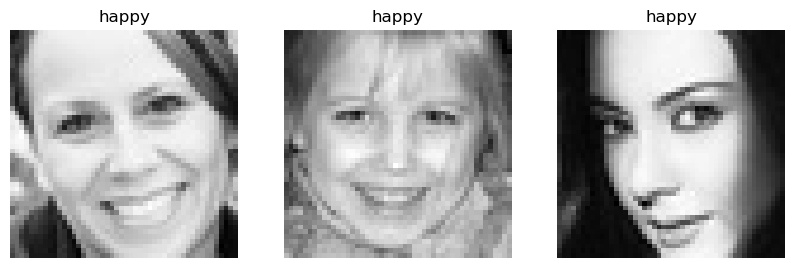

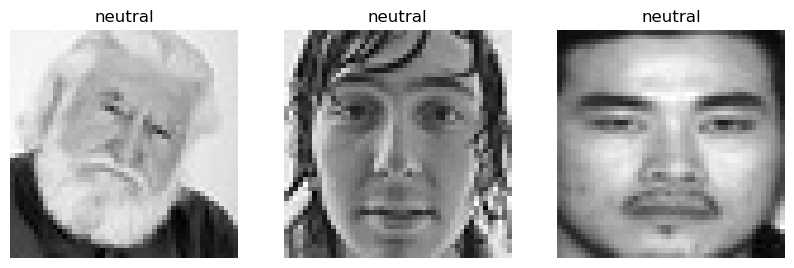

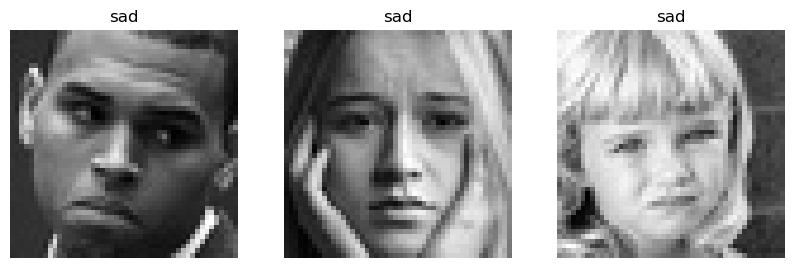

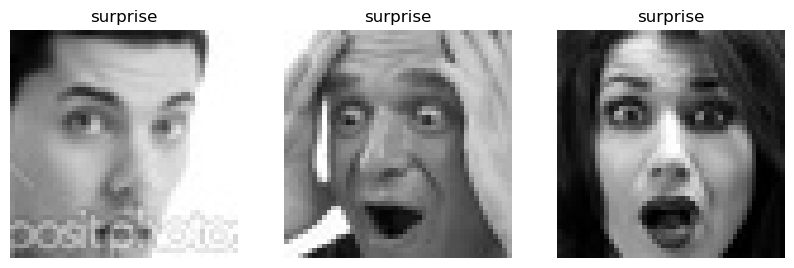

In [18]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def plot_random_images(base_dir, num_images=3):
    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            images = random.sample(os.listdir(subdir_path), num_images)
            plt.figure(figsize=(10, 5))
            for i, image_name in enumerate(images):
                image_path = os.path.join(subdir_path, image_name)
                image = Image.open(image_path)
                plt.subplot(1, num_images, i + 1)
                plt.imshow(image, cmap='gray')
                plt.title(subdir)
                plt.axis('off')
            plt.show()

print("Training set sample images:")
plot_random_images(train_dir)

print("Testing set sample images:")
plot_random_images(test_dir)

In [4]:
def count_images_in_subdirectories(base_dir):
    counts = {}
    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            counts[subdir] = len(os.listdir(subdir_path))
    return counts

train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

train_counts = count_images_in_subdirectories(train_dir)
test_counts = count_images_in_subdirectories(test_dir)

print("Training set counts:", train_counts)
print("Testing set counts:", test_counts)

Training set counts: {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
Testing set counts: {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


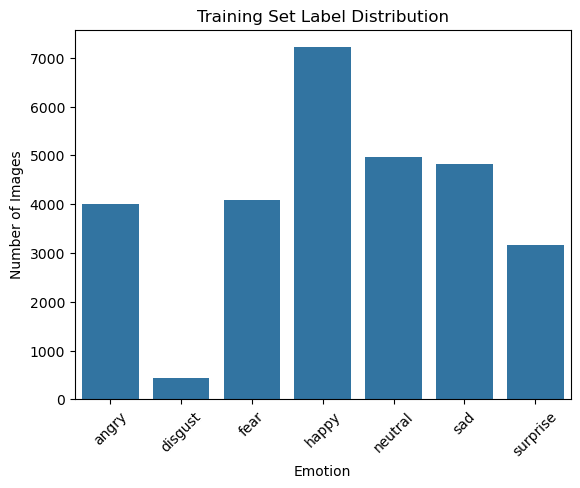

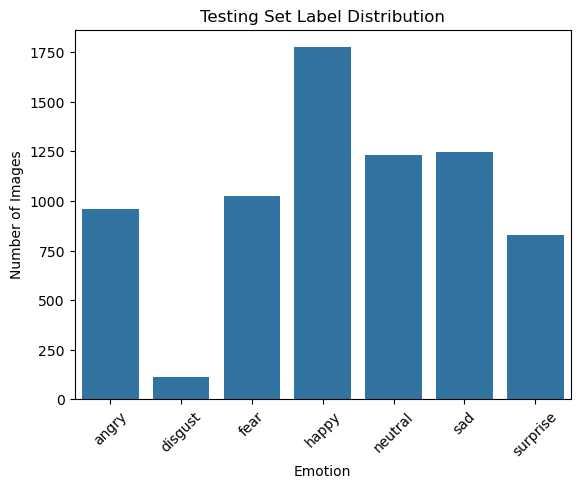

In [8]:
import seaborn as sns

def plot_label_distribution(counts, title):
    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.title(title)
    plt.ylabel("Number of Images")
    plt.xlabel("Emotion")
    plt.xticks(rotation=45)
    plt.show()

plot_label_distribution(train_counts, "Training Set Label Distribution")
plot_label_distribution(test_counts, "Testing Set Label Distribution")


The model may struggle to learn to recognize the emotion of 'disgust' due to the lack of data on it. 
We shouyld consider supplementing the data with more images so that the model distribution can be balanced.

The training and test directories are proportional. 

## Exploring Pixel Intensity

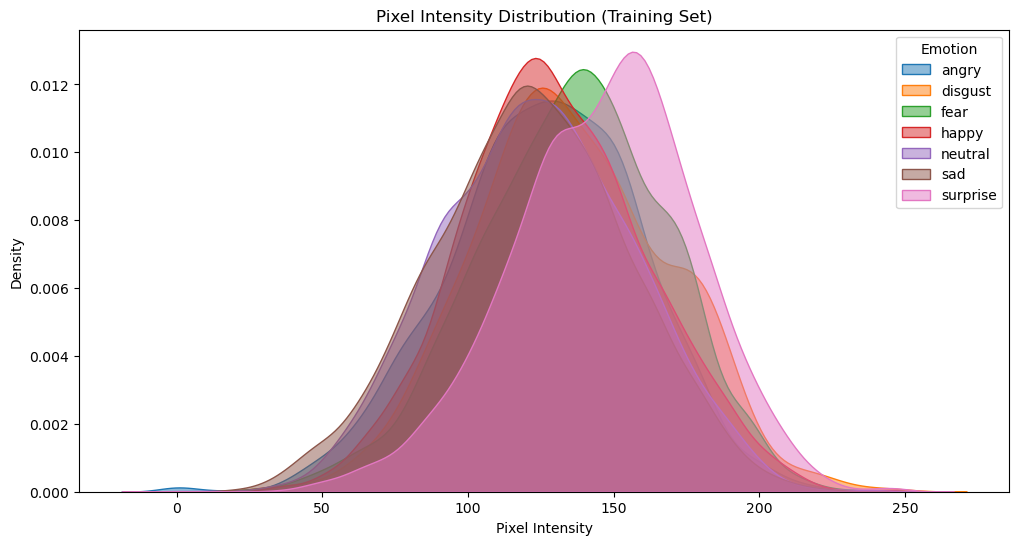

In [9]:
import numpy as np

def compute_pixel_intensity_distribution(base_dir):
    intensity_data = {}

    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            intensities = []
            for image_name in os.listdir(subdir_path):
                image_path = os.path.join(subdir_path, image_name)
                image = Image.open(image_path).convert('L')  # Convert to grayscale
                intensities.append(np.array(image).flatten().mean())  # Compute mean pixel intensity
            intensity_data[subdir] = intensities
    return intensity_data

def plot_pixel_intensity_distribution(intensity_data, title):
    plt.figure(figsize=(12, 6))
    for category, intensities in intensity_data.items():
        sns.kdeplot(intensities, label=category, fill=True, alpha=0.5)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Density")
    plt.legend(title="Emotion")
    plt.show()

# Compute pixel intensity distribution for the training dataset
train_intensity_data = compute_pixel_intensity_distribution(train_dir)

# Plot the distribution
plot_pixel_intensity_distribution(train_intensity_data, "Pixel Intensity Distribution (Training Set)")


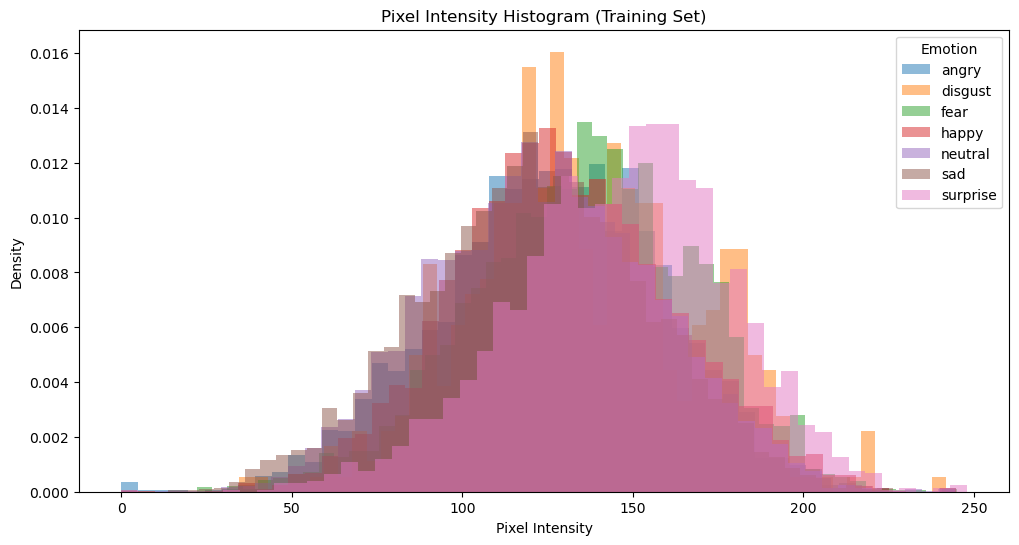

In [10]:
def plot_pixel_intensity_histogram(intensity_data, title):
    plt.figure(figsize=(12, 6))
    for category, intensities in intensity_data.items():
        plt.hist(intensities, bins=50, alpha=0.5, label=category, density=True)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Density")
    plt.legend(title="Emotion")
    plt.show()

# Plot histogram of pixel intensity
plot_pixel_intensity_histogram(train_intensity_data, "Pixel Intensity Histogram (Training Set)")


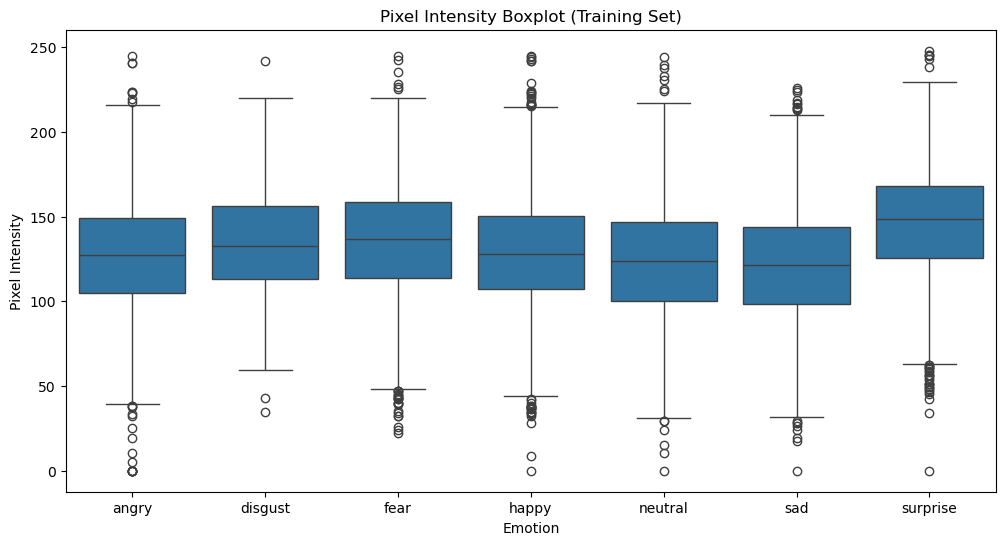

In [11]:
import pandas as pd
import seaborn as sns

def plot_pixel_intensity_boxplot(intensity_data, title):
    data = []
    for category, intensities in intensity_data.items():
        data.extend([(category, intensity) for intensity in intensities])
    df = pd.DataFrame(data, columns=['Emotion', 'Pixel Intensity'])
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Emotion', y='Pixel Intensity', data=df)
    plt.title(title)
    plt.xlabel("Emotion")
    plt.ylabel("Pixel Intensity")
    plt.show()

# Plot boxplot of pixel intensity
plot_pixel_intensity_boxplot(train_intensity_data, "Pixel Intensity Boxplot (Training Set)")


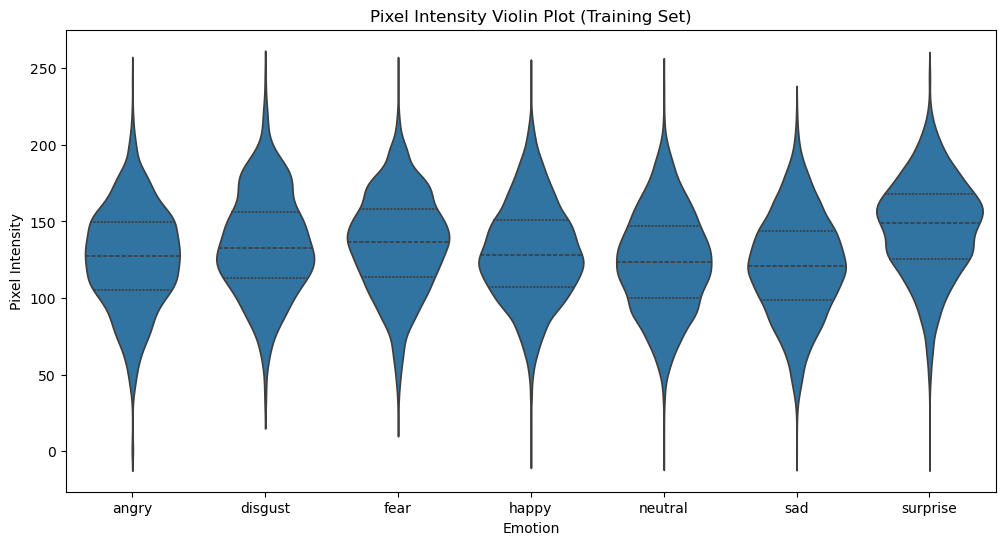

In [12]:
def plot_pixel_intensity_violinplot(intensity_data, title):
    data = []
    for category, intensities in intensity_data.items():
        data.extend([(category, intensity) for intensity in intensities])
    df = pd.DataFrame(data, columns=['Emotion', 'Pixel Intensity'])
    
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Emotion', y='Pixel Intensity', data=df, inner='quartile')
    plt.title(title)
    plt.xlabel("Emotion")
    plt.ylabel("Pixel Intensity")
    plt.show()

# Plot violin plot of pixel intensity
plot_pixel_intensity_violinplot(train_intensity_data, "Pixel Intensity Violin Plot (Training Set)")


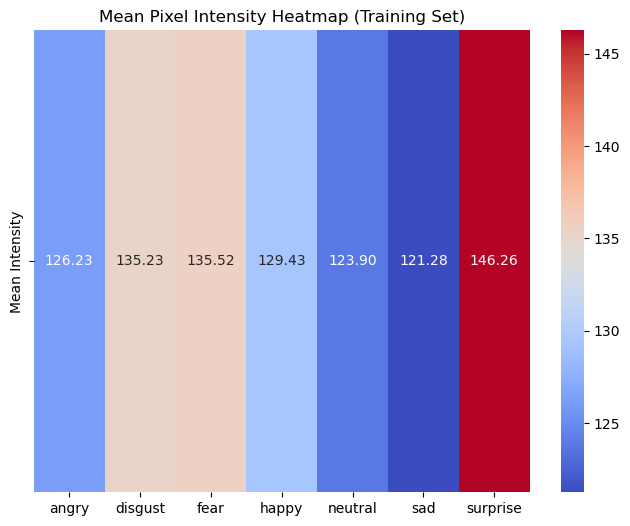

In [13]:
def plot_pixel_intensity_heatmap(intensity_data, title):
    mean_intensities = {category: np.mean(intensities) for category, intensities in intensity_data.items()}
    categories = list(mean_intensities.keys())
    values = list(mean_intensities.values())

    plt.figure(figsize=(8, 6))
    sns.heatmap([values], annot=True, fmt=".2f", xticklabels=categories, yticklabels=["Mean Intensity"], cmap="coolwarm")
    plt.title(title)
    plt.show()

# Plot heatmap of mean pixel intensity
plot_pixel_intensity_heatmap(train_intensity_data, "Mean Pixel Intensity Heatmap (Training Set)")


Interestingly enough, the 'surprise' emotion has the higher pixel intensity on average, which is an emotion that is describe as having 'brightness' 

brightness could be interpreted as face surface area, and lack of shadows

### Exploring Edges

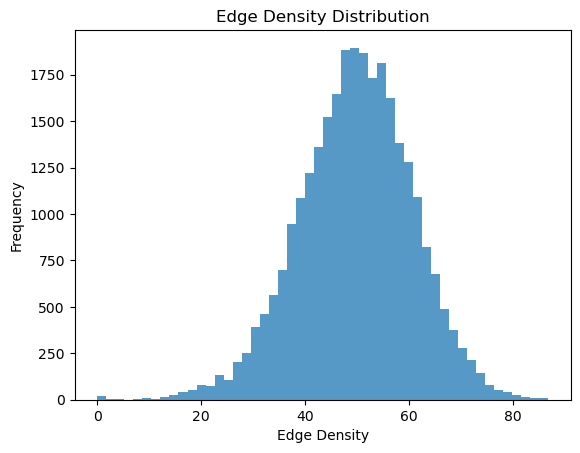

In [14]:
import cv2

def compute_edge_density(base_dir):
    edge_densities = []
    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            for image_name in os.listdir(subdir_path):
                image_path = os.path.join(subdir_path, image_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                edges = cv2.Canny(image, 100, 200)
                edge_density = edges.sum() / edges.size
                edge_densities.append(edge_density)
    return edge_densities

edge_densities = compute_edge_density(train_dir)

# Plot edge density
plt.hist(edge_densities, bins=50, alpha=0.75)
plt.title("Edge Density Distribution")
plt.xlabel("Edge Density")
plt.ylabel("Frequency")
plt.show()


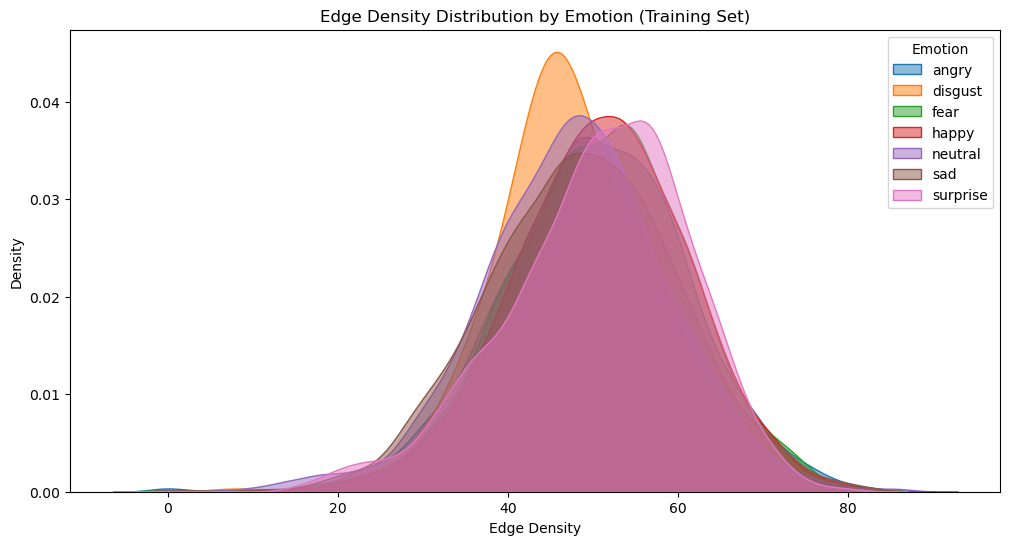

In [16]:

def compute_edge_density_by_emotion(base_dir):
    edge_densities_by_emotion = {}

    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            edge_densities = []
            for image_name in os.listdir(subdir_path):
                image_path = os.path.join(subdir_path, image_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                edges = cv2.Canny(image, 100, 200)
                edge_density = edges.sum() / edges.size
                edge_densities.append(edge_density)
            edge_densities_by_emotion[subdir] = edge_densities

    return edge_densities_by_emotion

# Compute edge densities for the training dataset
edge_densities_by_emotion = compute_edge_density_by_emotion(train_dir)

# Plot edge density distribution for each emotion
def plot_edge_density_by_emotion(edge_densities_by_emotion, title):
    plt.figure(figsize=(12, 6))
    for emotion, densities in edge_densities_by_emotion.items():
        sns.kdeplot(densities, label=emotion, fill=True, alpha=0.5)
    plt.title(title)
    plt.xlabel("Edge Density")
    plt.ylabel("Density")
    plt.legend(title="Emotion")
    plt.show()

# Plot the results
plot_edge_density_by_emotion(edge_densities_by_emotion, "Edge Density Distribution by Emotion (Training Set)")


### Exploring Entropy:

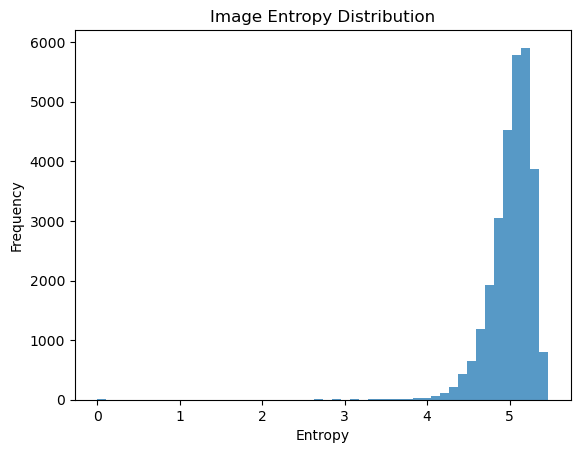

In [15]:
from scipy.stats import entropy

def compute_image_entropy(base_dir):
    entropies = []
    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            for image_name in os.listdir(subdir_path):
                image_path = os.path.join(subdir_path, image_name)
                image = Image.open(image_path).convert('L')
                hist = np.histogram(np.array(image).flatten(), bins=256, range=(0, 255))[0]
                hist = hist / hist.sum()
                entropies.append(entropy(hist))
    return entropies

image_entropies = compute_image_entropy(train_dir)

# Plot entropy distribution
plt.hist(image_entropies, bins=50, alpha=0.75)
plt.title("Image Entropy Distribution")
plt.xlabel("Entropy")
plt.ylabel("Frequency")
plt.show()


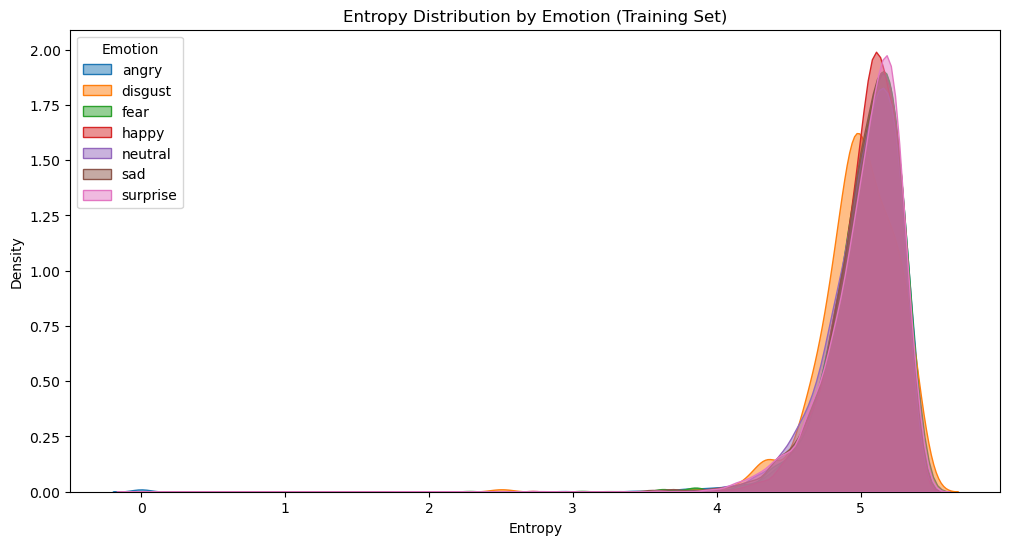

In [17]:
from scipy.stats import entropy
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

def compute_image_entropy_by_emotion(base_dir):
    entropy_by_emotion = {}

    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            entropies = []
            for image_name in os.listdir(subdir_path):
                image_path = os.path.join(subdir_path, image_name)
                image = Image.open(image_path).convert('L')  # Convert to grayscale
                hist = np.histogram(np.array(image).flatten(), bins=256, range=(0, 255))[0]
                hist = hist / hist.sum()  # Normalize the histogram
                entropies.append(entropy(hist))  # Calculate entropy
            entropy_by_emotion[subdir] = entropies

    return entropy_by_emotion

# Compute entropy for each emotion
entropy_by_emotion = compute_image_entropy_by_emotion(train_dir)

# Plot entropy distribution for each emotion
def plot_entropy_distribution(entropy_by_emotion, title):
    plt.figure(figsize=(12, 6))
    for emotion, entropies in entropy_by_emotion.items():
        sns.kdeplot(entropies, label=emotion, fill=True, alpha=0.5)
    plt.title(title)
    plt.xlabel("Entropy")
    plt.ylabel("Density")
    plt.legend(title="Emotion")
    plt.show()

# Plot the results
plot_entropy_distribution(entropy_by_emotion, "Entropy Distribution by Emotion (Training Set)")


Since faces are complex it makes sense that the images are all higher on the entropy scale. There does not appear to be much significant difference between the density distributions of each emotion to consider entropy in this case. 